In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
teams_master = pd.read_csv('../Data/Teams/teams_master.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
teams_master.head()

,Unnamed: 0,TEAM_ID,TEAM_CITY,TEAM_NAME,YEAR,GP,WINS,LOSSES,WIN_PCT,CONF_RANK,DIV_RANK,PO_WINS,PO_LOSSES,CONF_COUNT,DIV_COUNT,NBA_FINALS_APPEARANCE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,PF,STL,TOV,BLK,PTS,PTS_RANK,FG2M,FG2A,FG2_PCT,FG3A/FGA,FG2A/FGA,FTA/FGA,FG3A/FG2A,FG2M_PER_GP,FG3M_PER_GP,FG2A_PER_GP,FG3A_PER_GP,PTS_PER_GP,3PT_PER_PTS,2PT_PER_PTS,PLAYOFFS,CHAMPS,FINALS_LOSS,FINALS_APPEARANCE
0,34,1610612755,Philadelphia,76ers,1983-01-01,82,52,30,0.634,3,2,2,3,11.0,5,NaN,3384,6833,0.495,29,107,0.271,2041,2706,0.754,1181,2382,3563,2032,2040,807,1628,653,8838,16,3355,6726,0.498811,0.015659,0.984341,0.396019,0.015908,40.914634,0.353659,82.024390,1.304878,107.780488,0.009844,0.759222,1,0,0,0
1,35,1610612755,Philadelphia,76ers,1984-01-01,82,58,24,0.707,3,2,8,5,11.0,5,NaN,3443,6992,0.492,59,224,0.263,2316,2883,0.803,1301,2364,3665,1999,1971,817,1575,534,9261,8,3384,6768,0.500000,0.032037,0.967963,0.412328,0.033097,41.268293,0.719512,82.536585,2.731707,112.939024,0.019112,0.730807,1,0,0,0
2,36,1610612755,Philadelphia,76ers,1985-01-01,82,54,28,0.659,3,2,6,6,11.0,5,NaN,3435,7058,0.487,51,224,0.228,2130,2810,0.758,1326,2378,3704,2017,1798,862,1595,490,9051,11,3384,6834,0.495171,0.031737,0.968263,0.398130,0.032777,41.268293,0.621951,83.341463,2.731707,110.378049,0.016904,0.747763,1,0,0,0
3,37,1610612755,Philadelphia,76ers,1986-01-01,82,45,37,0.549,5,2,2,3,11.0,5,NaN,3335,6792,0.491,88,340,0.259,1971,2617,0.753,1178,2327,3505,1943,1774,768,1519,540,8729,17,3247,6452,0.503255,0.050059,0.949941,0.385306,0.052697,39.597561,1.073171,78.682927,4.146341,106.451220,0.030244,0.743957,1,0,0,0
4,38,1610612755,Philadelphia,76ers,1987-01-01,82,36,46,0.439,10,4,0,0,11.0,5,NaN,3214,6785,0.474,152,471,0.323,2087,2731,0.764,1219,2307,3526,1897,1866,672,1433,465,8667,16,3062,6314,0.484954,0.069418,0.930582,0.402506,0.074596,37.341463,1.853659,77.000000,5.743902,105.695122,0.052613,0.706588,0,0,0,0


In [9]:
teams_master.isna().sum()

Unnamed: 0                 0
TEAM_ID                    0
TEAM_CITY                  0
TEAM_NAME                  0
YEAR                       0
GP                         0
WINS                       0
LOSSES                     0
WIN_PCT                    0
CONF_RANK                  0
DIV_RANK                   0
PO_WINS                    0
PO_LOSSES                  0
CONF_COUNT                 0
DIV_COUNT                  0
NBA_FINALS_APPEARANCE    941
FGM                        0
FGA                        0
FG_PCT                     0
FG3M                       0
FG3A                       0
FG3_PCT                    0
FTM                        0
FTA                        0
FT_PCT                     0
OREB                       0
DREB                       0
REB                        0
AST                        0
PF                         0
STL                        0
TOV                        0
BLK                        0
PTS                        0
PTS_RANK      

In [5]:
# Create column with normalized wins in 82 game season to account for two lockout seasons

teams_master['Wins'] = teams_master['WINS']/teams_master['GP']*82
teams_master['FGA_PER_GP'] = teams_master['FGA']/teams_master['GP']

In [6]:
heatmap=teams_master[['Wins','FG_PCT','FG2_PCT','FG3_PCT','FT_PCT','FGA_PER_GP','FG2A_PER_GP','FG3A_PER_GP','PTS_PER_GP','FG3A/FG2A']]

In [ ]:
plt.figure(figsize=(16,9))

# Generate 10 variables of 200 random observations.
corr = np.corrcoef(teams_master[['Wins','FG_PCT','FG2_PCT','FG3_PCT','FT_PCT','FGA_PER_GP','FG2A_PER_GP','FG3A_PER_GP','PTS_PER_GP','FG3A/FG2A']])

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

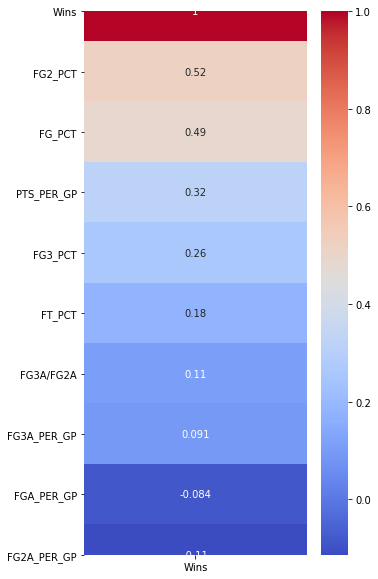

In [13]:
corrs = heatmap.corr()[['Wins']].sort_values(by='Wins',ascending=False)
plt.figure(figsize=(5,10))
sns.heatmap(corrs, annot=True, cmap='coolwarm');

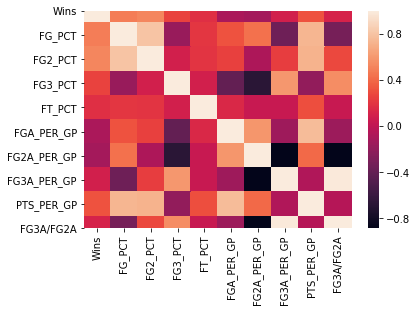

In [12]:
sns.heatmap(heatmap.corr())